> **DO NOT EDIT IF INSIDE `annadl_f19` folder** 

# Assignment 1

**Handin in Peergrade**: *Monday*, October 14, 2019, 23:59<br>
**Peergrading deadline**: *Friday*, October 18, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, October 20, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

> **Ex. 1.2.2**: Create a neural network with `sizes=[2, 1]`. This is actually just our most basic Perceptron model with two inputs and a single output. Generate 1e5 training datapoints and 1e4 testing datapoints using the `generate_X_linear` function, and fit the neural network to this data. Once you've fitted the network, make two plots of your test datapoints, one where points are colored by predictions and another where points are colored by their true labels. Can you say something about the points that are being mislabeled?
>
>*Hint*: You'll probably find some of Nielsen's examples from [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) in his book useful. Also, note that predictions are values between 0 and 1, not hard 0s and 1s, due to the sigmoid activation function. You can deal with this however you like when you color the points by prediction.

## SOLUTION:

In [1]:
%matplotlib inline
%load_ext tensorboard

import numpy as np
import random
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

def step(z, threshold=0.5):
    if z > threshold:
        return 1
    return 0

# Feed forward neural network class
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        # Q: Print these out, explain their contents. You can instantiate a network by
        # doing `net = Network([2, 3, 1])`, and then printing `net.biases`.
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        
        # Q: What is `a`? How many iterations will this loop run? For a `sizes=[2, 3, 1]`
        # network, what is the shape of `a` at each iteration?
        for b, w in zip(self.biases, self.weights): # 
            a = sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None, silent=False):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        # Ulf: For now we just treat this function as a black box.
        
        n = len(training_data)
        if test_data:
            n_test = len(test_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            if not silent:
                if test_data:
                    print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
                else:
                    print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        
        # Ulf: For now we just treat this function as a black box.

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        self.weights = [
            w - eta / len(mini_batch) * nw
            for w, nw in zip(self.weights, nabla_w)
        ]
        self.biases = [
            b - eta / len(mini_batch) * nb
            for b, nb in zip(self.biases, nabla_b)
        ]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        
        # Ulf: For now we just treat this function as a black box.
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book. Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on. It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return nabla_b, nabla_w

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        if self.sizes[-1] == 1:
            test_results = [
                (step(self.feedforward(x)), y)
                for x, y in test_data
            ]
        else:
            test_results = [
                (np.argmax(self.feedforward(x)), y)
                for x, y in test_data
            ]
        return sum(int(y_pred == y) for (y_pred, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations - y

In [3]:
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

In [4]:
x_train, y_train = generate_X_linear(1e5)
x_test, y_test = generate_X_linear(1e4)

In [5]:
network = Network([2, 1])

In [6]:
def prepare_data(X, y):
    """Format the dataset X and y so it fits with Nielsen's code."""
    return [
        (X[i].reshape(-1, 1), y[i].reshape(-1, 1))  # our tuple (x, y)
        for i in range(len(y))
    ]

In [7]:
class cmap_in_range:
    """Create map to range of colors inside given domain.

    Example
    -------
    >>> cmap = cmap_in_range([0, 1])
    >>> cmap(0.1)
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_domain, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain = cmap_domain
        self.cmap_range = cmap_range
        self.m = interp1d(cmap_domain, cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, value):
        if not self.cmap_domain[0] <= value <= self.cmap_domain[1]:
            raise Exception("Value must be inside cmap_domain.")
        return self.cmap(self.m(value))

In [8]:
train_set_linear = prepare_data(x_train ,y_train)
test_set_linear = prepare_data(x_test, y_test)

In [9]:
network.SGD(train_set_linear, epochs=5, mini_batch_size=100, eta=15.0, test_data=test_set_linear)

Epoch 0: 9968 / 10000
Epoch 1: 9967 / 10000
Epoch 2: 9968 / 10000
Epoch 3: 9970 / 10000
Epoch 4: 9968 / 10000


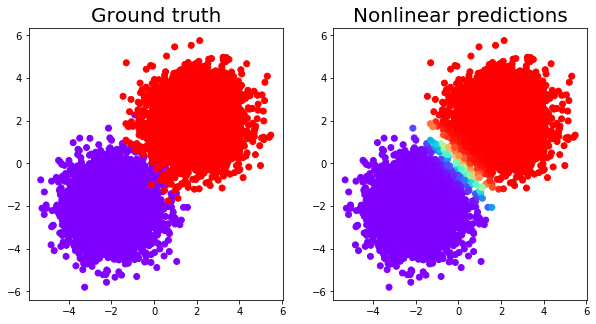

In [10]:
preds = np.array([network.feedforward(xy[0]) for xy in test_set_linear])
preds = np.array([x[0] for x in preds]).flatten()

truths = np.array([xy[1][0] for xy in test_set_linear])
         
coords = np.array([xy[0] for xy in test_set_linear])
Xs = [c[0] for c in coords]
Ys = [c[1] for c in coords]

cmap = cmap_in_range([0,1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1], c=[cmap(t) for t in y_test.flatten()])
plt.title("Ground truth", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=[cmap(pred) for pred in preds])
plt.title("Nonlinear predictions", fontsize=20)
plt.show()

There are only a few points that are mislabeled. These misclassified points are basically outliers of each group - positioned far from the center of the rest of its group.

> **Ex. 1.2.3**: Now we want to do the same thing as in Ex. 1.2.2, but with the data generated with the `generate_X_nonlinear` function.
>
>*Hint*: Think back to the slides to figure out what `sizes` should be.

In [11]:
def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

In [12]:
network_nonlinear = Network([2, 3, 1])

In [13]:
# generate training and testing data
train_x_nonlin, train_y_nonlin = generate_X_nonlinear(1e5)
test_x_nonlin, test_y_nonlin = generate_X_nonlinear(1e4)

In [14]:
training_set_nonlin = prepare_data(train_x_nonlin, train_y_nonlin)
testing_set_nonlin = prepare_data(test_x_nonlin, test_y_nonlin)

In [15]:
# fit the neural network
network_nonlinear.SGD(training_set_nonlin, epochs=5, mini_batch_size=100, eta=20.0, test_data=testing_set_nonlin)

Epoch 0: 9744 / 10000
Epoch 1: 9736 / 10000
Epoch 2: 9760 / 10000
Epoch 3: 9788 / 10000
Epoch 4: 9767 / 10000


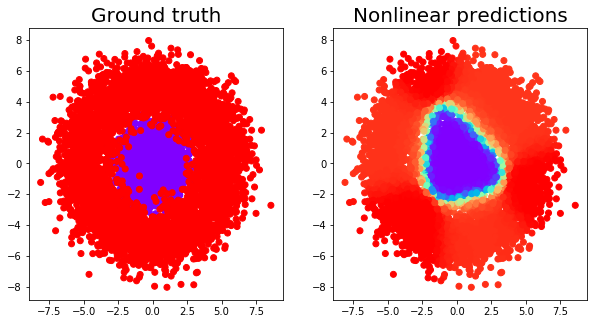

In [16]:
preds = np.array([network_nonlinear.feedforward(xy[0]) for xy in testing_set_nonlin])
preds = np.array([x[0] for x in preds]).flatten()

truths = np.array([xy[1][0] for xy in testing_set_nonlin])
         
coords = np.array([xy[0] for xy in testing_set_nonlin])
Xs = [c[0] for c in coords]
Ys = [c[1] for c in coords]

cmap = cmap_in_range([0,1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(test_x_nonlin[:,0], test_x_nonlin[:,1], c=[cmap(t) for t in test_y_nonlin.flatten()])
plt.title("Ground truth", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(test_x_nonlin[:,0], test_x_nonlin[:,1], c=[cmap(pred) for pred in preds])
plt.title("Nonlinear predictions", fontsize=20)
plt.show()

The points that are mislabeled are those that deviate from the group of points in the origin.

### Week 2

<img src="https://raw.githubusercontent.com/abjer/tsds/master/material_exercises/week_3/2_3_1_net.png" alt="drawing" width="500"/>

> **Ex. 2.2.1**: The network above has a defined input and weights. If the true label for the datapoint `[4, 2]` is 1, what is the cost?

## SOLUTION:


In [17]:
import numpy as np


a = sigmoid(1 + 0.5*4 + 1*2)
b = sigmoid(-1 + 2*4 + 10*2)
c = sigmoid(2 + -5*4 + 0.3*2)
d = sigmoid(-3 + 12*a + -8*b + 0.2*c)

cost = (1 - d)**2
print('The cost is %f' % cost)

The cost is 0.081237


> **Ex. 2.2.2**: Knowing about backpropagation, we actually have everything we need to compute the gradients of the weights by hand. So go ahead and do that. Report your answer either as a diagram that includes the gradients (you can draw on my figure somehow and insert the resulting image), or just by writing what the gradient of each weight is.
>
> *Hint: When computing gradients with backprop, it can be a bit easier to think of the network as a computational graph. My computational graph looks like [this](https://github.com/abjer/tsds/blob/master/material_exercises/week_3/2_3_1_net_compgraph.png?raw=true).*

## SOLUTION:

![solution_image](https://camo.githubusercontent.com/0aedbec64a1fc349a9785fc76a49db0a8b618a7d/68747470733a2f2f7777772e65646e617372617463697065732e636f6d2f696d616765732f6e65745f636f6d7067726170685f66696c6c65642e706e67)

In case the image is too small click [here](https://camo.githubusercontent.com/0aedbec64a1fc349a9785fc76a49db0a8b618a7d/68747470733a2f2f7777772e65646e617372617463697065732e636f6d2f696d616765732f6e65745f636f6d7067726170685f66696c6c65642e706e67)

### Week 3

> **Ex. 3.1.3** Solve exercises 1.2.2 and 1.2.3 from week 1, but solve them using Keras.
> Comment on differences in speed (and outcome if you observe any).
You can for example use Tensorboard to inspect the training performance throught the training epochs.

## SOLUTION:

### exercise 1.2.2

In [18]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras import optimizers

In [19]:
# generate training and test data
x_train_lin, y_train_lin = generate_X_linear(1e5)
x_test_lin, y_test_lin = generate_X_linear(1e4)

In [20]:
# 1.2.2 model [2, 1]

model_lin = Sequential() # sequential model

model_lin.add(Dense(units=2, activation='sigmoid', input_shape=(2,))) # input shape (N, 2)
model_lin.add(Dense(units=1, activation='sigmoid'))

model_lin.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
model_lin.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_lin.fit(x_train_lin, y_train_lin, epochs=5, batch_size=100)


Epoch 1/5
100000/100000 [==============================] - 3s 27us/step - loss: 0.3919 - acc: 0.9134
Epoch 2/5
100000/100000 [==============================] - 2s 21us/step - loss: 0.1761 - acc: 0.9968
Epoch 3/5
100000/100000 [==============================] - 2s 16us/step - loss: 0.1075 - acc: 0.9972
Epoch 4/5
100000/100000 [==============================] - 2s 16us/step - loss: 0.0768 - acc: 0.9975
Epoch 5/5
100000/100000 [==============================] - 2s 22us/step - loss: 0.0599 - acc: 0.9976


In [23]:
model_lin.evaluate(x_test_lin, y_test_lin)

10000/10000 [==============================] - 0s 41us/step


[0.05291072734594345, 0.9979]

### exercise 1.2.3

In [24]:
# generate training and test data
x_train_nonlin, y_train_nonlin = generate_X_nonlinear(1e5)
x_test_nonlin, y_test_nonlin = generate_X_nonlinear(1e4)

In [25]:
## 1.2.3 model [2, 3, 1]

model_nonlin = Sequential()

model_nonlin.add(Dense(units=2, activation='sigmoid', input_shape=(2, )))
model_nonlin.add(Dense(units=3, activation='sigmoid'))
model_nonlin.add(Dense(units=1, activation='sigmoid'))

# optimizer
sgd = optimizers.SGD(lr=1.5)

model_nonlin.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model_nonlin.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_nonlin.fit(x_train_nonlin, y_train_nonlin, epochs=15, batch_size=100)

Epoch 1/15
100000/100000 [==============================] - 3s 29us/step - loss: 0.4259 - acc: 0.8074
Epoch 2/15
100000/100000 [==============================] - 2s 17us/step - loss: 0.3701 - acc: 0.8432
Epoch 3/15
100000/100000 [==============================] - 1s 14us/step - loss: 0.3713 - acc: 0.8422
Epoch 4/15
100000/100000 [==============================] - 1s 14us/step - loss: 0.3706 - acc: 0.8422
Epoch 5/15
100000/100000 [==============================] - 1s 14us/step - loss: 0.3684 - acc: 0.8437
Epoch 6/15
100000/100000 [==============================] - 1s 15us/step - loss: 0.3682 - acc: 0.8432
Epoch 7/15
100000/100000 [==============================] - 2s 15us/step - loss: 0.3662 - acc: 0.8451
Epoch 8/15
100000/100000 [==============================] - 1s 14us/step - loss: 0.3669 - acc: 0.8445
Epoch 9/15
100000/100000 [==============================] - 1s 15us/step - loss: 0.3653 - acc: 0.8479
Epoch 10/15
100000/100000 [==============================] - 1s 15us/step - loss: 

In [27]:
model_nonlin.evaluate(x_test_nonlin, y_test_nonlin)

10000/10000 [==============================] - 0s 33us/step


[0.368781069535017, 0.8448]

Using the same architecture, there seems no difference in training speed or performance for exercise 1.2.2. However, there looks to be a differencei n both speed and performance for exercise 1.2.3. In fact, the Keras implementation trains slower and performs worse given the same hyperparameters. Even after adjusting for the hyperparameters, the Keras implementation still seems to lag behind. 

> **Ex. 3.2.1** To understand overfitting, we overfit some data! Let's fit a neural network to data that has no inherent patterns: *noise*.

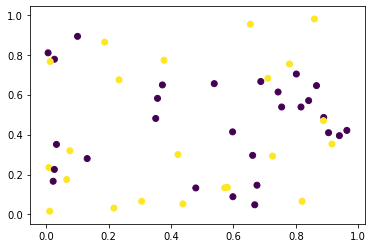

In [28]:
# Generate some data-points
x = np.random.random(size=(50, 2))

# And some random outcomes
y = np.random.randint(0, 2, size=(50, ))

# Plot it
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

> Now, create a network that attains a an accuracy score over 80% in predicting which points are class 0 and which are class 1.
>
> *Hint*: The bigger the network, the bigger the overfitting.

## SOLUTION:

In [29]:
from datetime import datetime

logdir = './logs'# + datetime.now().strftime("%Y%m%d-%H%M%S") # log file name
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
model_overfit = Sequential()

model_overfit.add(Dense(units=1024, activation='sigmoid', input_shape=(2,)))
model_overfit.add(Dense(units=1024, activation='sigmoid'))
model_overfit.add(Dense(units=1, activation='sigmoid'))

model_overfit.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

> The cell blow may take a couple of minutes but should overfit.

In [39]:
model_overfit.fit(x, y, epochs=5000, batch_size=100, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/1000
50/50 [==============================] - 0s 738us/step - loss: 0.3873 - acc: 0.8000
Epoch 2/1000
50/50 [==============================] - 0s 743us/step - loss: 0.3872 - acc: 0.8000
Epoch 3/1000
50/50 [==============================] - 0s 358us/step - loss: 0.3870 - acc: 0.8000
Epoch 4/1000
50/50 [==============================] - 0s 704us/step - loss: 0.3868 - acc: 0.8000
Epoch 5/1000
50/50 [==============================] - 0s 582us/step - loss: 0.3866 - acc: 0.8000
Epoch 6/1000
50/50 [==============================] - 0s 598us/step - loss: 0.3865 - acc: 0.8000
Epoch 7/1000
50/50 [==============================] - 0s 600us/step - loss: 0.3863 - acc: 0.8000
Epoch 8/1000
50/50 [==============================] - 0s 631us/step - loss: 0.3861 - acc: 0.8000
Epoch 9/1000
50/50 [==============================] - 0s 870us/step - loss: 0.3859 - acc: 0.8000
Epoch 10/1000
50/50 [==============================] - 0s 480us/step - loss: 0.3858 - acc: 0.8000
Epoch 11/1000
50/50 [========

Epoch 85/1000
50/50 [==============================] - 0s 629us/step - loss: 0.3715 - acc: 0.7800
Epoch 86/1000
50/50 [==============================] - 0s 527us/step - loss: 0.3713 - acc: 0.7800
Epoch 87/1000
50/50 [==============================] - 0s 752us/step - loss: 0.3711 - acc: 0.7800
Epoch 88/1000
50/50 [==============================] - 0s 757us/step - loss: 0.3709 - acc: 0.7800
Epoch 89/1000
50/50 [==============================] - 0s 592us/step - loss: 0.3707 - acc: 0.7800
Epoch 90/1000
50/50 [==============================] - 0s 617us/step - loss: 0.3705 - acc: 0.7800
Epoch 91/1000
50/50 [==============================] - 0s 557us/step - loss: 0.3703 - acc: 0.7800
Epoch 92/1000
50/50 [==============================] - 0s 711us/step - loss: 0.3700 - acc: 0.7800
Epoch 93/1000
50/50 [==============================] - 0s 875us/step - loss: 0.3698 - acc: 0.7800
Epoch 94/1000
50/50 [==============================] - 0s 668us/step - loss: 0.3696 - acc: 0.7800
Epoch 95/1000
50/50 

Epoch 168/1000
50/50 [==============================] - 0s 551us/step - loss: 0.3534 - acc: 0.7800
Epoch 169/1000
50/50 [==============================] - 0s 576us/step - loss: 0.3532 - acc: 0.7800
Epoch 170/1000
50/50 [==============================] - 0s 621us/step - loss: 0.3530 - acc: 0.7800
Epoch 171/1000
50/50 [==============================] - 0s 671us/step - loss: 0.3527 - acc: 0.7800
Epoch 172/1000
50/50 [==============================] - 0s 588us/step - loss: 0.3525 - acc: 0.7800
Epoch 173/1000
50/50 [==============================] - 0s 785us/step - loss: 0.3522 - acc: 0.7800
Epoch 174/1000
50/50 [==============================] - 0s 525us/step - loss: 0.3520 - acc: 0.7800
Epoch 175/1000
50/50 [==============================] - 0s 674us/step - loss: 0.3517 - acc: 0.7800
Epoch 176/1000
50/50 [==============================] - 0s 406us/step - loss: 0.3515 - acc: 0.7800
Epoch 177/1000
50/50 [==============================] - 0s 593us/step - loss: 0.3512 - acc: 0.7800
Epoch 178/

Epoch 251/1000
50/50 [==============================] - 0s 682us/step - loss: 0.3299 - acc: 0.8200
Epoch 252/1000
50/50 [==============================] - 0s 584us/step - loss: 0.3296 - acc: 0.8200
Epoch 253/1000
50/50 [==============================] - 0s 512us/step - loss: 0.3294 - acc: 0.8200
Epoch 254/1000
50/50 [==============================] - 0s 577us/step - loss: 0.3291 - acc: 0.8200
Epoch 255/1000
50/50 [==============================] - 0s 679us/step - loss: 0.3288 - acc: 0.8200
Epoch 256/1000
50/50 [==============================] - 0s 688us/step - loss: 0.3285 - acc: 0.8200
Epoch 257/1000
50/50 [==============================] - 0s 765us/step - loss: 0.3281 - acc: 0.8200
Epoch 258/1000
50/50 [==============================] - 0s 769us/step - loss: 0.3278 - acc: 0.8200
Epoch 259/1000
50/50 [==============================] - 0s 787us/step - loss: 0.3276 - acc: 0.8200
Epoch 260/1000
50/50 [==============================] - 0s 600us/step - loss: 0.3273 - acc: 0.8200
Epoch 261/

Epoch 334/1000
50/50 [==============================] - 0s 513us/step - loss: 0.3037 - acc: 0.9200
Epoch 335/1000
50/50 [==============================] - 0s 553us/step - loss: 0.3033 - acc: 0.9200
Epoch 336/1000
50/50 [==============================] - 0s 753us/step - loss: 0.3030 - acc: 0.9000
Epoch 337/1000
50/50 [==============================] - 0s 580us/step - loss: 0.3027 - acc: 0.9000
Epoch 338/1000
50/50 [==============================] - 0s 530us/step - loss: 0.3024 - acc: 0.9000
Epoch 339/1000
50/50 [==============================] - 0s 878us/step - loss: 0.3020 - acc: 0.9000
Epoch 340/1000
50/50 [==============================] - 0s 591us/step - loss: 0.3017 - acc: 0.9000
Epoch 341/1000
50/50 [==============================] - 0s 689us/step - loss: 0.3013 - acc: 0.9200
Epoch 342/1000
50/50 [==============================] - 0s 647us/step - loss: 0.3010 - acc: 0.9200
Epoch 343/1000
50/50 [==============================] - 0s 971us/step - loss: 0.3006 - acc: 0.9200
Epoch 344/

Epoch 417/1000
50/50 [==============================] - 0s 637us/step - loss: 0.2761 - acc: 0.9200
Epoch 418/1000
50/50 [==============================] - 0s 711us/step - loss: 0.2758 - acc: 0.9200
Epoch 419/1000
50/50 [==============================] - 0s 570us/step - loss: 0.2754 - acc: 0.9200
Epoch 420/1000
50/50 [==============================] - 0s 595us/step - loss: 0.2751 - acc: 0.9200
Epoch 421/1000
50/50 [==============================] - 0s 765us/step - loss: 0.2748 - acc: 0.9200
Epoch 422/1000
50/50 [==============================] - 0s 551us/step - loss: 0.2745 - acc: 0.9200
Epoch 423/1000
50/50 [==============================] - 0s 594us/step - loss: 0.2742 - acc: 0.9200
Epoch 424/1000
50/50 [==============================] - 0s 628us/step - loss: 0.2738 - acc: 0.9200
Epoch 425/1000
50/50 [==============================] - 0s 692us/step - loss: 0.2735 - acc: 0.9200
Epoch 426/1000
50/50 [==============================] - 0s 660us/step - loss: 0.2732 - acc: 0.9200
Epoch 427/

Epoch 500/1000
50/50 [==============================] - 0s 580us/step - loss: 0.2500 - acc: 0.9600
Epoch 501/1000
50/50 [==============================] - 0s 578us/step - loss: 0.2497 - acc: 0.9600
Epoch 502/1000
50/50 [==============================] - 0s 568us/step - loss: 0.2495 - acc: 0.9600
Epoch 503/1000
50/50 [==============================] - 0s 595us/step - loss: 0.2492 - acc: 0.9600
Epoch 504/1000
50/50 [==============================] - 0s 560us/step - loss: 0.2489 - acc: 0.9600
Epoch 505/1000
50/50 [==============================] - 0s 678us/step - loss: 0.2486 - acc: 0.9600
Epoch 506/1000
50/50 [==============================] - 0s 682us/step - loss: 0.2482 - acc: 0.9600
Epoch 507/1000
50/50 [==============================] - 0s 757us/step - loss: 0.2479 - acc: 0.9600
Epoch 508/1000
50/50 [==============================] - 0s 486us/step - loss: 0.2476 - acc: 0.9600
Epoch 509/1000
50/50 [==============================] - 0s 787us/step - loss: 0.2473 - acc: 0.9600
Epoch 510/

Epoch 583/1000
50/50 [==============================] - 0s 594us/step - loss: 0.2254 - acc: 0.9600
Epoch 584/1000
50/50 [==============================] - 0s 835us/step - loss: 0.2252 - acc: 0.9600
Epoch 585/1000
50/50 [==============================] - 0s 574us/step - loss: 0.2249 - acc: 0.9600
Epoch 586/1000
50/50 [==============================] - 0s 697us/step - loss: 0.2246 - acc: 0.9600
Epoch 587/1000
50/50 [==============================] - 0s 734us/step - loss: 0.2242 - acc: 0.9600
Epoch 588/1000
50/50 [==============================] - 0s 732us/step - loss: 0.2238 - acc: 0.9600
Epoch 589/1000
50/50 [==============================] - 0s 698us/step - loss: 0.2234 - acc: 0.9600
Epoch 590/1000
50/50 [==============================] - 0s 533us/step - loss: 0.2232 - acc: 0.9600
Epoch 591/1000
50/50 [==============================] - 0s 702us/step - loss: 0.2230 - acc: 0.9600
Epoch 592/1000
50/50 [==============================] - 0s 716us/step - loss: 0.2228 - acc: 0.9600
Epoch 593/

Epoch 666/1000
50/50 [==============================] - 0s 791us/step - loss: 0.2031 - acc: 0.9600
Epoch 667/1000
50/50 [==============================] - 0s 565us/step - loss: 0.2029 - acc: 0.9600
Epoch 668/1000
50/50 [==============================] - 0s 663us/step - loss: 0.2027 - acc: 0.9600
Epoch 669/1000
50/50 [==============================] - 0s 708us/step - loss: 0.2024 - acc: 0.9600
Epoch 670/1000
50/50 [==============================] - 0s 597us/step - loss: 0.2021 - acc: 0.9600
Epoch 671/1000
50/50 [==============================] - 0s 609us/step - loss: 0.2017 - acc: 0.9600
Epoch 672/1000
50/50 [==============================] - 0s 569us/step - loss: 0.2014 - acc: 0.9600
Epoch 673/1000
50/50 [==============================] - 0s 600us/step - loss: 0.2011 - acc: 0.9600
Epoch 674/1000
50/50 [==============================] - 0s 588us/step - loss: 0.2009 - acc: 0.9600
Epoch 675/1000
50/50 [==============================] - 0s 617us/step - loss: 0.2007 - acc: 0.9600
Epoch 676/

Epoch 749/1000
50/50 [==============================] - 0s 548us/step - loss: 0.1835 - acc: 0.9600
Epoch 750/1000
50/50 [==============================] - 0s 671us/step - loss: 0.1834 - acc: 0.9600
Epoch 751/1000
50/50 [==============================] - 0s 637us/step - loss: 0.1832 - acc: 0.9600
Epoch 752/1000
50/50 [==============================] - 0s 566us/step - loss: 0.1829 - acc: 0.9600
Epoch 753/1000
50/50 [==============================] - 0s 701us/step - loss: 0.1827 - acc: 0.9600
Epoch 754/1000
50/50 [==============================] - 0s 787us/step - loss: 0.1824 - acc: 0.9600
Epoch 755/1000
50/50 [==============================] - 0s 733us/step - loss: 0.1822 - acc: 0.9600
Epoch 756/1000
50/50 [==============================] - 0s 824us/step - loss: 0.1820 - acc: 0.9600
Epoch 757/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.1818 - acc: 0.9600
Epoch 758/1000
50/50 [==============================] - 0s 527us/step - loss: 0.1816 - acc: 0.9600
Epoch 759/10

Epoch 832/1000
50/50 [==============================] - 0s 525us/step - loss: 0.1663 - acc: 0.9600
Epoch 833/1000
50/50 [==============================] - 0s 515us/step - loss: 0.1661 - acc: 0.9600
Epoch 834/1000
50/50 [==============================] - 0s 628us/step - loss: 0.1659 - acc: 0.9600
Epoch 835/1000
50/50 [==============================] - 0s 766us/step - loss: 0.1657 - acc: 0.9600
Epoch 836/1000
50/50 [==============================] - 0s 634us/step - loss: 0.1655 - acc: 0.9600
Epoch 837/1000
50/50 [==============================] - 0s 613us/step - loss: 0.1653 - acc: 0.9600
Epoch 838/1000
50/50 [==============================] - 0s 849us/step - loss: 0.1652 - acc: 0.9600
Epoch 839/1000
50/50 [==============================] - 0s 615us/step - loss: 0.1650 - acc: 0.9600
Epoch 840/1000
50/50 [==============================] - 0s 502us/step - loss: 0.1648 - acc: 0.9600
Epoch 841/1000
50/50 [==============================] - 0s 945us/step - loss: 0.1646 - acc: 0.9600
Epoch 842/

Epoch 915/1000
50/50 [==============================] - 0s 434us/step - loss: 0.1513 - acc: 0.9600
Epoch 916/1000
50/50 [==============================] - 0s 760us/step - loss: 0.1511 - acc: 0.9600
Epoch 917/1000
50/50 [==============================] - 0s 765us/step - loss: 0.1509 - acc: 0.9600
Epoch 918/1000
50/50 [==============================] - 0s 699us/step - loss: 0.1507 - acc: 0.9600
Epoch 919/1000
50/50 [==============================] - 0s 639us/step - loss: 0.1506 - acc: 0.9600
Epoch 920/1000
50/50 [==============================] - 0s 627us/step - loss: 0.1505 - acc: 0.9600
Epoch 921/1000
50/50 [==============================] - 0s 757us/step - loss: 0.1503 - acc: 0.9600
Epoch 922/1000
50/50 [==============================] - 0s 526us/step - loss: 0.1501 - acc: 0.9600
Epoch 923/1000
50/50 [==============================] - 0s 530us/step - loss: 0.1499 - acc: 0.9600
Epoch 924/1000
50/50 [==============================] - 0s 575us/step - loss: 0.1497 - acc: 0.9600
Epoch 925/

Epoch 998/1000
50/50 [==============================] - 0s 547us/step - loss: 0.1382 - acc: 0.9600
Epoch 999/1000
50/50 [==============================] - 0s 613us/step - loss: 0.1381 - acc: 0.9600
Epoch 1000/1000
50/50 [==============================] - 0s 605us/step - loss: 0.1379 - acc: 0.9600


### Week 4

In [32]:
#%tensorboard --logdir logs/

Here's the formula for computing the size of the activation map resulting from a convolution. 
If you have a filter that is $F$ wide, your input image is $W_0$ wide, you are padding the edges by
$P$ pixels and your stride is $S$, the resulting image will have width/height:

$$ W_1 = \frac{W_0 - F + 2P}{S} + 1 $$

> **Ex. 4.1.2**: You input an image of dimensions $28 \times 28 \times 3$, use a padding of 2, a stride of 1,
and then slide your $5 \times 5 \times 3$ filter across the image. What is the dimensionality of the resulting activation map?

## SOLUTION:

Since the input image has width $W_0 = 28$, the filter has width $F=5$, the padding is $P=2$, and the stride is $S = 1$, the width of the resulting activation map is
\begin{align}
W_1 &= \frac{W_0 - F + 2P}{S} + 1 \\
&= \frac{28 - 5 + 2(2)}{1} + 1 \\
&= 28.
\end{align}
Since there was only one filter, the dimensionality of the resulting activation is $28 \times 28 \times 1$.

> **Ex. 4.1.3**: Let's say you now want to use a stride of 2, instead of 1. What problem does this immediately cause?
How can we solve it?

## SOLUTION:

Using a stride of 2 instead of 1, we are left with a trailing fraction upon division since the numerator is $27$ and the denominator is $2$. To solve this problem, we usually increase the padding but since the padding is multiplied by $2$, the numerator will always remain an odd number and thus we will still be left with a remainder upon division. If we want to keep a stride of $2$, we must then change the dimensionality of the filter to an even-numbered width and height (ie $4 \times 4 \times 3$).

In the following exercise you will use the MNIST dataset again. In the cell below I have written some code to prepare it somewhat. For your own sake, try to understand what's happening.

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data so it has a channel dimension
rows, cols = x_train.shape[-2:]
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

# Convert pixel intensities to values between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
    
# Convert target vectors to one-hot encoding
num_classes = len(set(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

> **Ex. 4.1.5**: Implement Nielsen's [last convolutional neural network](http://neuralnetworksanddeeplearning.com/chap6.html#convolutional_neural_networks_in_practice)
(the one with two convolutional layers and dropout), and score an accuracy higher than 98%. It doesn't have to be
fully identical, but his solution is pretty great, so getting close is a cheap way to score a high accuracy.
>
> *Hint:* [here](https://keras.io/examples/mnist_cnn/) is an example of a CNN in Keras.

## SOLUTION:

Here we define a sequential model with two convolutional layers, each with 24 and 40 $5 \times 5$ filters and a max pooling layer, respectively. The output tensor is flattened before the fully connected and dropout layers. 

In [34]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu', input_shape=(28,28,1,)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               204928    
__________

In [36]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.2981 - acc: 0.9075
Epoch 2/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.0978 - acc: 0.9705
Epoch 3/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0731 - acc: 0.9782
Epoch 4/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0618 - acc: 0.9808
Epoch 5/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0538 - acc: 0.9836
Epoch 6/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0455 - acc: 0.9858
Epoch 7/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0437 - acc: 0.9865
Epoch 8/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0377 - acc: 0.9884
Epoch 9/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0348 - acc: 0.9888
Epoch 10/10
60000/60000 [==============================] - 21s 345us/step - loss: 

In [37]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 184us/step


[0.024619892729230194, 0.9915]